In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv("C:\\Users\\George\\Documents\\Rutgers\\Statistical Learning\\Final Project\\train.tsv", sep = '\t')
test = pd.read_csv("C:\\Users\\George\\Documents\\Rutgers\\Statistical Learning\\Final Project\\test.tsv", sep = '\t')

In [32]:
#Split train data into X and y matrix. And get X_test matrix ready too.

from keras.utils import to_categorical
X = train['Phrase']
y = to_categorical(train['Sentiment'])
X_test = test['Phrase']

In [10]:
# Spilt Train Test sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=100)

In [11]:
from keras.preprocessing.text import Tokenizer

max_features = 15000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)
X_test = tokenizer.texts_to_sequences(X_test)

In [15]:
#Pad the datasets
from keras.preprocessing import sequence
max_words = 30 #max(totalNumWords)

X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_val = sequence.pad_sequences(X_val, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [20]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM

batch_size = 128
epochs = 5
max_features = 15000
embed_dim = 100

In [24]:
#Build LSTM Model

np.random.seed(100)
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_history = model.fit(X_train, y_train, validation_data = (X_val,y_val),
                         epochs = epochs, batch_size = batch_size, verbose = 2)


Train on 124848 samples, validate on 31212 samples
Epoch 1/5
 - 139s - loss: 0.9977 - acc: 0.6012 - val_loss: 0.8537 - val_acc: 0.6524
Epoch 2/5
 - 143s - loss: 0.7835 - acc: 0.6791 - val_loss: 0.8197 - val_acc: 0.6632
Epoch 3/5
 - 142s - loss: 0.7136 - acc: 0.7053 - val_loss: 0.8136 - val_acc: 0.6690
Epoch 4/5
 - 139s - loss: 0.6661 - acc: 0.7209 - val_loss: 0.8239 - val_acc: 0.6646
Epoch 5/5
 - 133s - loss: 0.6273 - acc: 0.7356 - val_loss: 0.8410 - val_acc: 0.6631


In [27]:
import matplotlib.pyplot as plt
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()


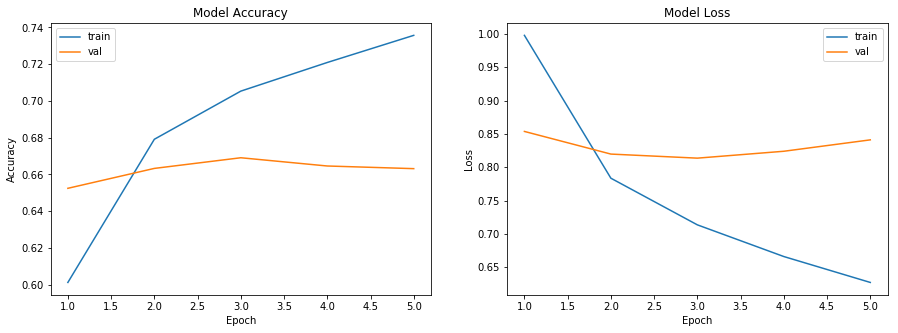

In [28]:
plot_model_history(model_history)

Model has highest accuracy and lowest loss at 3 epochs. So we will train the full training model with 3 epochs, batch size = 128, max features = 15000 and embed_dim = 100

In [33]:
#Create the LSTM model on the full X data and use to predict for X-test

max_features = 15000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X))
X_train = tokenizer.texts_to_sequences(X)
X_test = tokenizer.texts_to_sequences(X_test)

In [34]:
#Pad the datasets
from keras.preprocessing import sequence
max_words = 30 #max(totalNumWords)

X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [39]:
#Build the final model

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM

batch_size = 128
epochs = 3
max_features = 15000
embed_dim = 100

np.random.seed(100)
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_history = model.fit(X_train, y,
                         epochs = epochs, batch_size = batch_size, verbose = 2)

Epoch 1/3
 - 283s - loss: 0.9651 - acc: 0.6099
Epoch 2/3
 - 510s - loss: 0.7715 - acc: 0.6823
Epoch 3/3
 - 587s - loss: 0.7088 - acc: 0.7050


In [49]:
#Get test values for Xtest dataframe
y_preds_test = model.predict_classes(X_test, batch_size=batch_size, verbose=0)



In [50]:
#Export test preds to dataframe for Kaggle submission

y_preds_test = y_preds_test.tolist()
df = pd.DataFrame({'col': y_preds_test})
df.to_csv("C:\\Users\\George\\Documents\\Rutgers\\Statistical Learning\\Final Project\\lstm_results.csv")